In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6)
print(june)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [5]:
#  3. Convert the June temperatures to a list.
june = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()
june

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
#  3. Convert the June temperatures to a list.(Another option)
junetemps = list((june))
junetemps

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june,columns=['date','June Temps'])
june_df.set_index(june_df['date'], inplace=True)

In [8]:
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


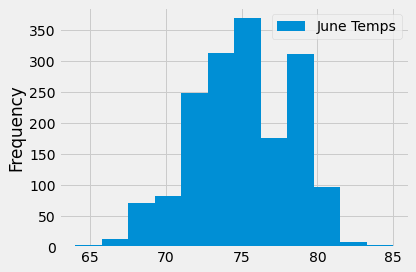

In [9]:
# Plot Summary Statistics for June temperature
# june_df.hist(column=['June Temps'])             Another method
june_df.plot.hist(bins=12)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()

In [11]:
# 7. Convert the December temperatures to a list.
decembertemps = list((december))
decembertemps

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(decembertemps,columns=['date','December Temps'])
december_df.set_index(december_df['date'], inplace=True)

In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


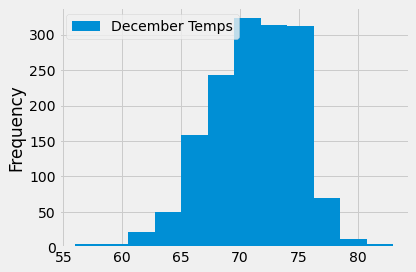

In [14]:
# Plot Summary Statistics for December temperature
# december_df.hist(column=['December Temps'])   Anouther method to plot histogram
december_df.plot.hist(bins=12)
plt.tight_layout()


# D3: Additional Query 
(Weather data for June and December togeather)

In [15]:
# Merge the describe method output 
june_data = june_df.describe()
december_data = december_df.describe()

result_df = june_data.merge(december_data, left_index=True, right_index=True)
result_df



,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [16]:
# Write a query that filters the Measurement table to retrieve the average temperature most active station in month of June.
june_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 6).all()
print(june_station)

[(78.0, 'USC00519397'), (76.0, 'USC00519397'), (78.0, 'USC00519397'), (76.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (79.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (82.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (76.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (73.0, 'USC00519397'), (70.0, 'USC00519397'), (76.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'US

In [17]:
june_station_df = pd.DataFrame(june_station, columns=['June Temps', 'Station'])
june_station_df.head()

,June Temps,Station
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397


In [18]:
# Write a query that filters the Measurement table to retrieve the average temperature most active station in month of December.
december_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 12).all()
december_station

[(76.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (64.0, 'USC00519397'),
 (64.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (66.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (66.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (75.0, 'USC00519397'),
 (75.0, 'USC00519397'),
 (72.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (72.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (73.0, 'USC0051

In [19]:
december_station_df = pd.DataFrame(december_station, columns=['Dec Temps', 'Station'])
december_station_df.head()

,Dec Temps,Station
0,76.0,USC00519397
1,74.0,USC00519397
2,74.0,USC00519397
3,64.0,USC00519397
4,64.0,USC00519397


In [20]:
station_temps = june_station_df.merge(december_station_df, on="Station", how="inner").set_index("Station")
station_temps.head()

,June Temps,Dec Temps
Station,,
USC00519397,78.0,76.0
USC00519397,78.0,74.0
USC00519397,78.0,74.0
USC00519397,78.0,64.0
USC00519397,78.0,64.0


In [21]:
# Create a Dataframe
Summary_df = pd.DataFrame()

# Loop and Get Reuqired Details for each Month
for i in range(1,12):
    # Fill Data in a List
    temp_list = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==i).all()
    
    # Create a DataFrame
    temp_month_df = pd.DataFrame(temp_list, columns=['date','Temps'])
    temp_month_df.set_index(temp_month_df['date'], inplace=True)
    
    # Get the Required Variables
    temp_month_para_df = temp_month_df.describe()
    
    # Store in our New Data Frame
    temp_count = temp_month_para_df.loc['count','Temps']
    temp_mean = temp_month_para_df.loc['mean','Temps']
    temp_std = temp_month_para_df.loc['std','Temps']
    temp_min = temp_month_para_df.loc['min','Temps']
    temp_max = temp_month_para_df.loc['max','Temps']
    
    # Create New Row
    temp_row = {'Month':i, 'Count':temp_count, 'Mean':temp_mean, 'Std':temp_std, 'Min':temp_min, 'Max':temp_max}
    
    # Store into DataFrame
    Summary_df = Summary_df.append(temp_row, ignore_index = True)

# Print New Summary Data Frame
print(Summary_df)

C:\Users\admin\AppData\Local\Temp\ipykernel_13864\2767625654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Summary_df = Summary_df.append(temp_row, ignore_index = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_13864\2767625654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Summary_df = Summary_df.append(temp_row, ignore_index = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_13864\2767625654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Summary_df = Summary_df.append(temp_row, ignore_index = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_13864\2767625654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Su

    Month   Count       Mean       Std   Min   Max
0     1.0  1727.0  68.726115  4.367892  54.0  81.0
1     2.0  1610.0  69.442236  3.981399  56.0  83.0
2     3.0  1693.0  70.059067  3.845271  56.0  82.0
3     4.0  1713.0  72.357268  3.632131  53.0  84.0
4     5.0  1733.0  73.680900  3.355783  63.0  87.0
5     6.0  1700.0  74.944118  3.257417  64.0  85.0
6     7.0  1711.0  76.082408  3.356532  61.0  87.0
7     8.0  1622.0  76.412454  3.453138  65.0  87.0
8     9.0  1480.0  76.164865  3.535178  64.0  87.0
9    10.0  1556.0  75.391388  3.545084  64.0  86.0
10   11.0  1488.0  73.252688  3.617282  61.0  83.0


C:\Users\admin\AppData\Local\Temp\ipykernel_13864\2767625654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Summary_df = Summary_df.append(temp_row, ignore_index = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_13864\2767625654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Summary_df = Summary_df.append(temp_row, ignore_index = True)


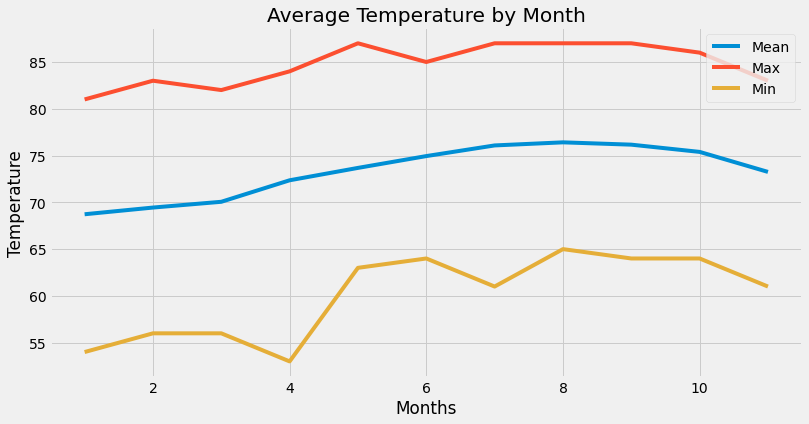

In [22]:
# Plot Line Graph
#fig,lines = plt.subplots()
#lines= fig.add_subplot()
#lines.plot(Summary_df.Month, Summary_df.Mean, color='yellow')
#lines2 = lines.twinx()
#lines2.plot(Summary_df.Month, Summary_df.Max, color='green')
#lines3 = lines.twinx()
#lines3.plot(Summary_df.Month, Summary_df.Min, color='red')

#lines2.plot(x='Month', y='Count')

lines = Summary_df.plot.line(x='Month', y=['Mean','Max','Min'], grid=True,figsize=(12,6))
plt.legend(loc='upper right')
plt.title("Average Temperature by Month")
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.show()